## Description

Company XYZ is a food delivery company. Like pretty much any other site, in order to get customers, they have been relying significantly on online ads, such as those you see on Google or Facebook.

At the moment, they are running **40 different ad campaigns** and want you to help them understand their performance.

Specifically, you are asked to:
* If you had to identify the 5 best ad groups, which ones would they be? Which metric did you choose to identify the best ad groups? Why? Explain the pros of your metric as well as the possible cons.

* For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).

* Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down.


## Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ad_table = pd.read_csv('/Users/YaoJunyan/Documents/A collection of Data Science take-home challenge/Ads Analysis/ad_table.csv')

In [3]:
ad_table.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [4]:
ad_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
date                  2115 non-null object
shown                 2115 non-null int64
clicked               2115 non-null int64
converted             2115 non-null int64
avg_cost_per_click    2115 non-null float64
total_revenue         2115 non-null float64
ad                    2115 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 115.7+ KB


In [5]:
# How many ad groups:

print(ad_table['ad'].unique())

['ad_group_1' 'ad_group_2' 'ad_group_3' 'ad_group_4' 'ad_group_5'
 'ad_group_6' 'ad_group_7' 'ad_group_8' 'ad_group_9' 'ad_group_10'
 'ad_group_11' 'ad_group_12' 'ad_group_13' 'ad_group_14' 'ad_group_15'
 'ad_group_16' 'ad_group_17' 'ad_group_18' 'ad_group_19' 'ad_group_20'
 'ad_group_21' 'ad_group_22' 'ad_group_23' 'ad_group_24' 'ad_group_25'
 'ad_group_26' 'ad_group_27' 'ad_group_28' 'ad_group_29' 'ad_group_30'
 'ad_group_31' 'ad_group_32' 'ad_group_33' 'ad_group_34' 'ad_group_35'
 'ad_group_36' 'ad_group_37' 'ad_group_38' 'ad_group_39' 'ad_group_40']


## Question 1: identify the 5 best ad groups


#### Metric 1: convert rate / average_cost_per_click

Why : If my goal is to aquire users with lowest costs, then we should use convert rate / average_cost_per_click


In [6]:
# calculate click through rate:
ad_table['ctr']= ad_table['clicked']/ ad_table['shown']
# Calculate convert rate:
ad_table['convert_rate'] = ad_table['converted']/ ad_table['clicked']
ad_table['metric'] = ad_table['convert_rate']/ ad_table['avg_cost_per_click']

In [7]:
grouped = ad_table.groupby('ad')['metric'].mean()

In [8]:
grouped.sort_values(ascending=False)

ad
ad_group_31    0.603242
ad_group_2     0.164611
ad_group_16    0.162457
ad_group_14    0.120004
ad_group_27    0.082721
ad_group_36    0.062370
ad_group_15    0.060375
ad_group_22    0.058883
ad_group_13    0.055591
ad_group_34    0.051889
ad_group_21    0.046923
ad_group_12    0.044359
ad_group_9     0.044111
ad_group_23    0.040873
ad_group_33    0.039607
ad_group_18    0.035653
ad_group_5     0.032493
ad_group_17    0.029866
ad_group_37    0.028857
ad_group_11    0.028113
ad_group_40    0.027975
ad_group_20    0.025698
ad_group_4     0.025653
ad_group_26    0.023155
ad_group_1     0.018341
ad_group_28    0.016355
ad_group_8     0.014818
ad_group_30    0.012281
ad_group_19    0.012045
ad_group_6     0.011137
ad_group_10    0.010288
ad_group_29    0.009493
ad_group_35    0.005894
ad_group_38    0.005235
ad_group_32    0.004329
ad_group_24    0.003178
ad_group_7     0.002927
ad_group_3     0.001401
ad_group_39    0.000816
ad_group_25    0.000000
Name: metric, dtype: float64

Using this metric, we can quickly find out group 31, 2,16,14,and 27 has the lowest cost but highest convert rate

### Metric 2: Profit= Reveue - Cost (assume avg_cost_per_click is all cost company spent on this ad campion)

Profit is the most common metric used in businesses

In [9]:
ad_table['profit'] = ad_table['total_revenue']- ad_table['avg_cost_per_click'] * ad_table['clicked']

In [10]:
ad_table.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad,ctr,convert_rate,metric,profit
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1,0.035506,0.018384,0.020427,-1463.48
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1,0.038372,0.015212,0.016183,-1591.75
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1,0.032735,0.021185,0.024633,-1018.28
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1,0.040582,0.018002,0.017824,-1953.94
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1,0.039539,0.015208,0.015208,-1816.55


In [11]:
grouped2= ad_table.groupby('ad')['profit'].sum()
grouped2.sort_values(ascending= False)

ad
ad_group_2       54456.44
ad_group_31      40265.93
ad_group_16      32179.55
ad_group_14       7252.95
ad_group_27       2528.73
ad_group_9        -441.44
ad_group_15      -1888.62
ad_group_36      -1987.58
ad_group_22      -5101.02
ad_group_21      -5101.07
ad_group_35     -15035.29
ad_group_17     -15850.14
ad_group_33     -17241.68
ad_group_25     -23321.96
ad_group_40     -40464.42
ad_group_24     -55763.86
ad_group_23     -57301.62
ad_group_30     -59917.28
ad_group_12     -60901.57
ad_group_34     -63031.31
ad_group_11     -65985.38
ad_group_39     -84212.22
ad_group_10     -85808.30
ad_group_6      -93731.40
ad_group_29    -100634.04
ad_group_1     -100802.69
ad_group_28    -140146.89
ad_group_5     -168157.42
ad_group_19    -179941.79
ad_group_13    -182233.01
ad_group_8     -221157.50
ad_group_32    -332060.59
ad_group_37    -343485.18
ad_group_18    -400822.23
ad_group_20    -421822.75
ad_group_7     -450554.40
ad_group_26    -510406.11
ad_group_4     -643395.85
ad_group_

Use this metric, we can see the top 5 profitable ad groups are 2, 31, 16, 14, and 27

## Question 2 : For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).

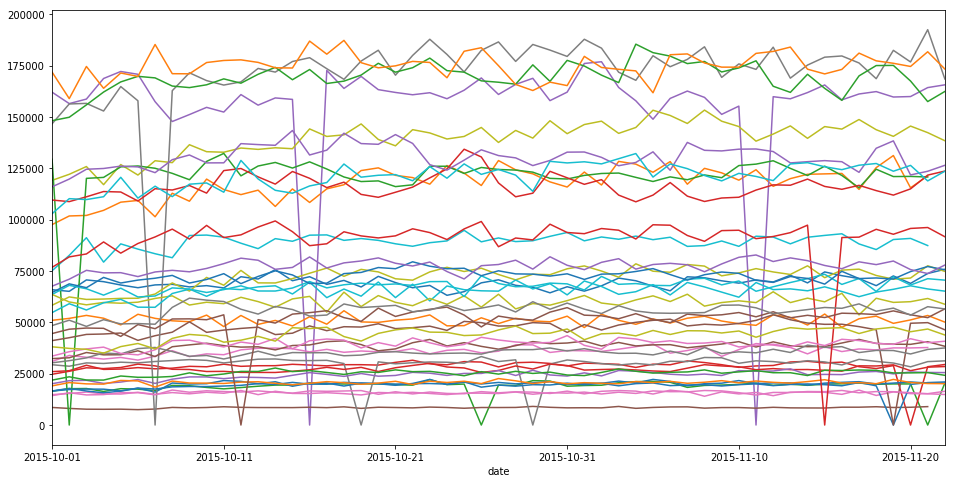

In [12]:
grouped_shown= ad_table.groupby('ad')
fig, ax = plt.subplots(figsize= (16,8))
for key, group in grouped_shown:
    group.plot('date', 'shown', label = key, ax= ax, legend = None)

## ARMA model to predict the number of ads shown on Dec 15, 2015

In [13]:
from statsmodels.tsa.arima_model import ARMA